In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [65]:
cdata = pd.read_csv('Mall_Customers.csv')

In [66]:
cdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
cdata.shape

(200, 5)

In [68]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [69]:
cdata.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: >

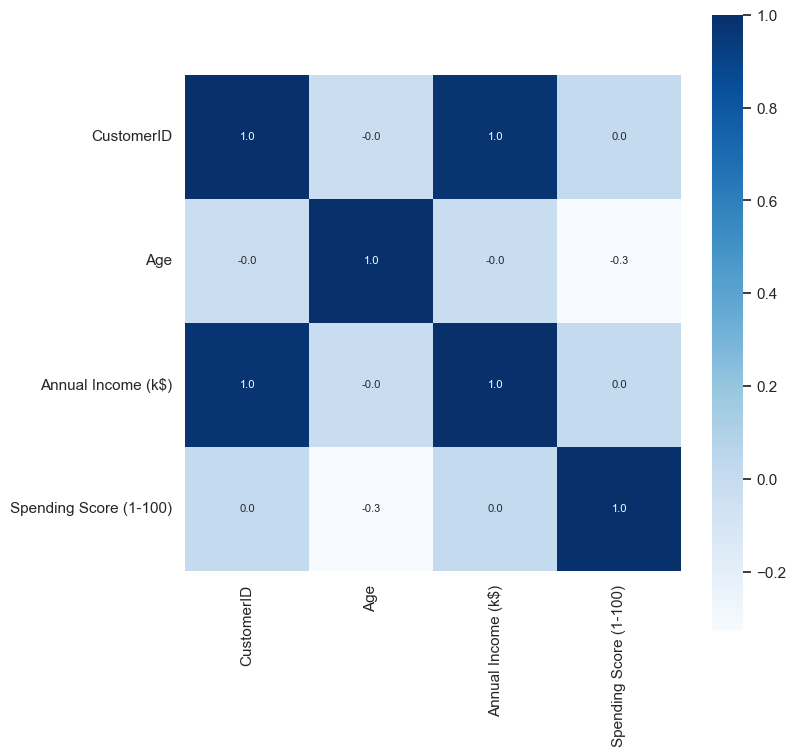

In [70]:
selected_col = cdata[['CustomerID' , 'Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']]
correlation = selected_col.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

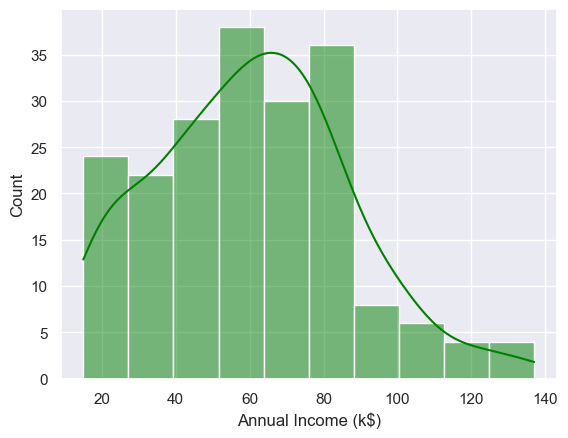

In [71]:
sns.histplot(cdata['Annual Income (k$)'] , color = 'green' , kde = True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

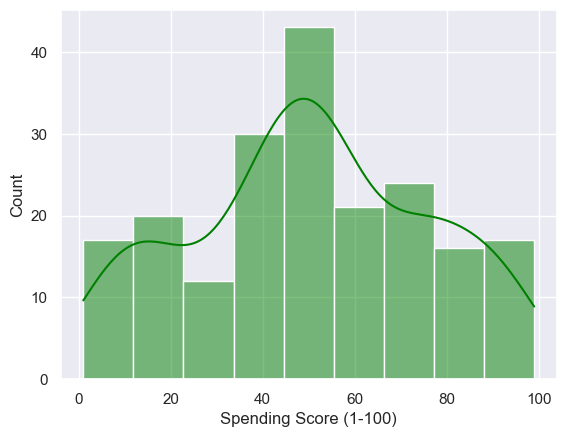

In [72]:
sns.histplot(cdata['Spending Score (1-100)'] , color = 'green' , kde = True)

<Axes: xlabel='Age', ylabel='Count'>

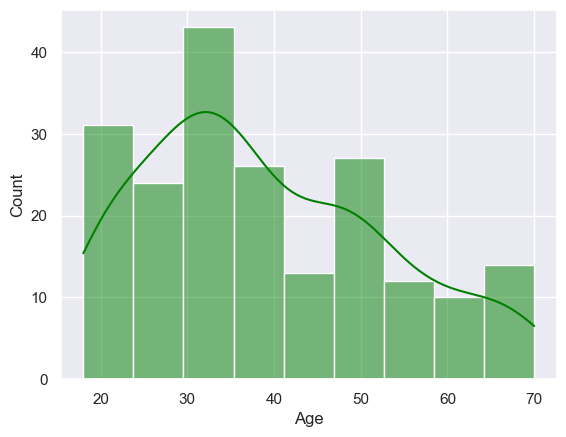

In [73]:
sns.histplot(cdata['Age'] , color = 'green' , kde = True)

In [74]:
A = cdata.iloc[:,[3,4]].values

In [75]:
wcss = []

for i in range(1,11):

  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 69)
  kmeans.fit(A)
  wcss.append(kmeans.inertia_)

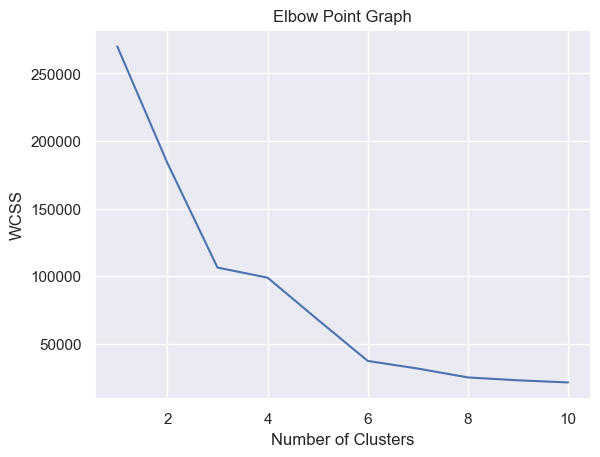

In [76]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state = 0)

B = kmeans.fit_predict(A)

print(B)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


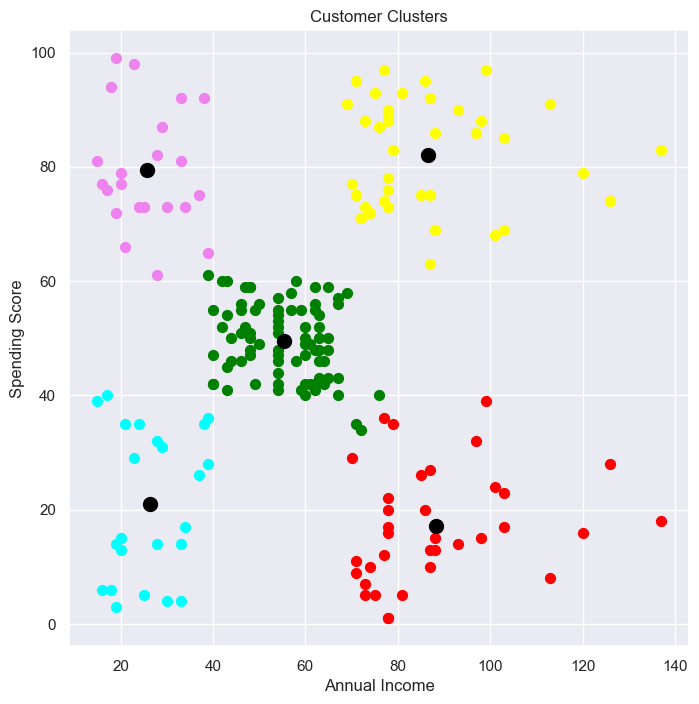

In [78]:
plt.figure(figsize = (8,8))

plt.scatter(A[B==0,0] , A[B==0,1] , s = 50 , c = 'green' , label = 'Cluster 1')
plt.scatter(A[B==1,0] , A[B==1,1] , s = 50 , c = 'yellow' , label = 'Cluster 2')
plt.scatter(A[B==2,0] , A[B==2,1] , s = 50 , c = 'red' , label = 'Cluster 3')
plt.scatter(A[B==3,0] , A[B==3,1] , s = 50 , c = 'cyan' , label = 'Cluster 4')
plt.scatter(A[B==4,0] , A[B==4,1] , s = 50 , c = 'violet' , label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 100 , c='black' , label = 'Centroids')

plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

We can conclude by performing following K means Clustering Algorithm that how we can target customers by analyzing the given cluster plot and make important decisions according to it.

We can also make effective strategies to improve the mall sales by analyzing the group of people.